In [1]:
from preprocessing import *
import preprocessing as prp
import pandas as pd
import torch
import torch.nn as nn
import torch.utils.data as data_utils
from usad import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
dataframe = pd.read_csv(r"/home/medoro/Unsupervised_Anomaly_Detection_thesis/data/train.csv")
dataframe.shape

(1749494, 57)

In [3]:
df=dataframe[['building_id','primary_use', 'timestamp', 'meter_reading', 'sea_level_pressure', 'is_holiday','anomaly']]
df

building_id                    primary_use            timestamp  \
0                  1                      Education  2016-01-01 00:00:00   
1                 32                         Office  2016-01-01 00:00:00   
2                 41                         Office  2016-01-01 00:00:00   
3                 55                         Office  2016-01-01 00:00:00   
4                 69                        Parking  2016-01-01 00:00:00   
...              ...                            ...                  ...   
1749489         1316  Entertainment/public assembly  2016-12-31 23:00:00   
1749490         1318  Entertainment/public assembly  2016-12-31 23:00:00   
1749491         1319  Entertainment/public assembly  2016-12-31 23:00:00   
1749492         1323                         Office  2016-12-31 23:00:00   
1749493         1353              Religious worship  2016-12-31 23:00:00   

         meter_reading  sea_level_pressure  is_holiday  anomaly  
0                  NaN               967.2           1        0  
1                  NaN               967.2           1        0  
2                  NaN               967.2           1        0  
3                  NaN               967.2           1        0  
4                  NaN               967.2           1        0  
...                ...                 ...         ...      ...  
1749489         38.844               967.2           0        0  
1749490        202.893               967.2           0        0  
1749491            NaN               967.2           0        0  
1749492        172.000               967.2           0        0  
1749493          2.400               967.2           0        0  

[1749494 rows x 7 columns]

In [4]:
imputed_df = impute_nulls(df)
imputed_df

building_id        primary_use            timestamp  meter_reading  \
0                  1          Education  2016-01-01 00:00:00      31.477940   
200                1          Education  2016-01-01 01:00:00      29.582970   
398                1          Education  2016-01-01 02:00:00      28.635485   
597                1          Education  2016-01-01 03:00:00      28.161742   
796                1          Education  2016-01-01 04:00:00      27.924871   
...              ...                ...                  ...            ...   
1748693         1353  Religious worship  2016-12-31 19:00:00       2.425000   
1748893         1353  Religious worship  2016-12-31 20:00:00       2.450000   
1749093         1353  Religious worship  2016-12-31 21:00:00       2.425000   
1749293         1353  Religious worship  2016-12-31 22:00:00       2.450000   
1749493         1353  Religious worship  2016-12-31 23:00:00       2.400000   

         sea_level_pressure  is_holiday  anomaly  
0                     967.2           1        0  
200                  1019.4           1        0  
398                  1018.8           1        0  
597                  1018.1           1        0  
796                  1019.0           1        0  
...                     ...         ...      ...  
1748693               967.2           0        0  
1748893               967.2           0        0  
1749093               967.2           0        0  
1749293               967.2           0        0  
1749493               967.2           0        0  

[1749494 rows x 7 columns]

Now that we have imputed the missing values for the column containing the energy consumption measurements, we can procees by adding a couple of features more and further imputing the missing dates for each timeseries in the dataset.

In [5]:
df = add_trigonometric_features(imputed_df)
df

building_id        primary_use           timestamp  meter_reading  \
0                  1          Education 2016-01-01 00:00:00      31.477940   
200                1          Education 2016-01-01 01:00:00      29.582970   
398                1          Education 2016-01-01 02:00:00      28.635485   
597                1          Education 2016-01-01 03:00:00      28.161742   
796                1          Education 2016-01-01 04:00:00      27.924871   
...              ...                ...                 ...            ...   
1748693         1353  Religious worship 2016-12-31 19:00:00       2.425000   
1748893         1353  Religious worship 2016-12-31 20:00:00       2.450000   
1749093         1353  Religious worship 2016-12-31 21:00:00       2.425000   
1749293         1353  Religious worship 2016-12-31 22:00:00       2.450000   
1749493         1353  Religious worship 2016-12-31 23:00:00       2.400000   

         sea_level_pressure  is_holiday  anomaly  weekday  weekday_y  \
0                     967.2           1        0        4  -0.433884   
200                  1019.4           1        0        4  -0.433884   
398                  1018.8           1        0        4  -0.433884   
597                  1018.1           1        0        4  -0.433884   
796                  1019.0           1        0        4  -0.433884   
...                     ...         ...      ...      ...        ...   
1748693               967.2           0        0        5  -0.974928   
1748893               967.2           0        0        5  -0.974928   
1749093               967.2           0        0        5  -0.974928   
1749293               967.2           0        0        5  -0.974928   
1749493               967.2           0        0        5  -0.974928   

         weekday_x  
0        -0.900969  
200      -0.900969  
398      -0.900969  
597      -0.900969  
796      -0.900969  
...            ...  
1748693  -0.222521  
1748893  -0.222521  
1749093  -0.222521  
1749293  -0.222521  
1749493  -0.222521  

[1749494 rows x 10 columns]

In [6]:
dfs_dict = impute_missing_dates(df)

/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:76: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_index = pd.date_range(start_ts, end=end_ts, freq="1H")


In [7]:
dfs_dict

{1:                      building_id primary_use  meter_reading  \
 2016-01-01 00:00:00            1   Education      31.477940   
 2016-01-01 01:00:00            1   Education      29.582970   
 2016-01-01 02:00:00            1   Education      28.635485   
 2016-01-01 03:00:00            1   Education      28.161742   
 2016-01-01 04:00:00            1   Education      27.924871   
 ...                          ...         ...            ...   
 2016-12-31 19:00:00            1   Education      20.006000   
 2016-12-31 20:00:00            1   Education      15.364000   
 2016-12-31 21:00:00            1   Education      15.685000   
 2016-12-31 22:00:00            1   Education      15.925000   
 2016-12-31 23:00:00            1   Education      14.964000   
 
                      sea_level_pressure  is_holiday  anomaly  weekday  \
 2016-01-01 00:00:00               967.2           1        0        4   
 2016-01-01 01:00:00              1019.4           1        0        4   
 2016

In [8]:
df1 = pd.concat(dfs_dict.values())
df1

building_id        primary_use  meter_reading  \
2016-01-01 00:00:00            1          Education      31.477940   
2016-01-01 01:00:00            1          Education      29.582970   
2016-01-01 02:00:00            1          Education      28.635485   
2016-01-01 03:00:00            1          Education      28.161742   
2016-01-01 04:00:00            1          Education      27.924871   
...                          ...                ...            ...   
2016-12-31 19:00:00         1353  Religious worship       2.425000   
2016-12-31 20:00:00         1353  Religious worship       2.450000   
2016-12-31 21:00:00         1353  Religious worship       2.425000   
2016-12-31 22:00:00         1353  Religious worship       2.450000   
2016-12-31 23:00:00         1353  Religious worship       2.400000   

                     sea_level_pressure  is_holiday  anomaly  weekday  \
2016-01-01 00:00:00               967.2           1        0        4   
2016-01-01 01:00:00              1019.4           1        0        4   
2016-01-01 02:00:00              1018.8           1        0        4   
2016-01-01 03:00:00              1018.1           1        0        4   
2016-01-01 04:00:00              1019.0           1        0        4   
...                                 ...         ...      ...      ...   
2016-12-31 19:00:00               967.2           0        0        5   
2016-12-31 20:00:00               967.2           0        0        5   
2016-12-31 21:00:00               967.2           0        0        5   
2016-12-31 22:00:00               967.2           0        0        5   
2016-12-31 23:00:00               967.2           0        0        5   

                     weekday_y  weekday_x  
2016-01-01 00:00:00  -0.433884  -0.900969  
2016-01-01 01:00:00  -0.433884  -0.900969  
2016-01-01 02:00:00  -0.433884  -0.900969  
2016-01-01 03:00:00  -0.433884  -0.900969  
2016-01-01 04:00:00  -0.433884  -0.900969  
...                        ...        ...  
2016-12-31 19:00:00  -0.974928  -0.222521  
2016-12-31 20:00:00  -0.974928  -0.222521  
2016-12-31 21:00:00  -0.974928  -0.222521  
2016-12-31 22:00:00  -0.974928  -0.222521  
2016-12-31 23:00:00  -0.974928  -0.222521  

[1756800 rows x 9 columns]

Let's now obtain the train and validation set. We are going to split the dataset into 2 sets, according to the building id.

In [9]:
#dfs_train, dfs_val = train_val_split(df1)
#train = pd.concat(dfs_train.values())

In [10]:
#val = pd.concat(dfs_val.values())

In [9]:
dfs_train, dfs_val, dfs_test = train_val_test_split(df1)
train = pd.concat(dfs_train.values())

In [10]:
val = pd.concat(dfs_val.values())

In [11]:
test = pd.concat(dfs_test.values())

In [12]:
train

building_id primary_use  meter_reading  \
2016-01-01 00:00:00            1   Education      31.477940   
2016-01-01 01:00:00            1   Education      29.582970   
2016-01-01 02:00:00            1   Education      28.635485   
2016-01-01 03:00:00            1   Education      28.161742   
2016-01-01 04:00:00            1   Education      27.924871   
...                          ...         ...            ...   
2016-12-31 19:00:00         1238      Office      54.900000   
2016-12-31 20:00:00         1238      Office      56.000000   
2016-12-31 21:00:00         1238      Office      66.400000   
2016-12-31 22:00:00         1238      Office      67.100000   
2016-12-31 23:00:00         1238      Office      71.400000   

                     sea_level_pressure  is_holiday  anomaly  weekday  \
2016-01-01 00:00:00               967.2           1        0        4   
2016-01-01 01:00:00              1019.4           1        0        4   
2016-01-01 02:00:00              1018.8           1        0        4   
2016-01-01 03:00:00              1018.1           1        0        4   
2016-01-01 04:00:00              1019.0           1        0        4   
...                                 ...         ...      ...      ...   
2016-12-31 19:00:00               967.2           0        0        5   
2016-12-31 20:00:00               967.2           0        0        5   
2016-12-31 21:00:00               967.2           0        0        5   
2016-12-31 22:00:00               967.2           0        0        5   
2016-12-31 23:00:00               967.2           0        0        5   

                     weekday_y  weekday_x  
2016-01-01 00:00:00  -0.433884  -0.900969  
2016-01-01 01:00:00  -0.433884  -0.900969  
2016-01-01 02:00:00  -0.433884  -0.900969  
2016-01-01 03:00:00  -0.433884  -0.900969  
2016-01-01 04:00:00  -0.433884  -0.900969  
...                        ...        ...  
2016-12-31 19:00:00  -0.974928  -0.222521  
2016-12-31 20:00:00  -0.974928  -0.222521  
2016-12-31 21:00:00  -0.974928  -0.222521  
2016-12-31 22:00:00  -0.974928  -0.222521  
2016-12-31 23:00:00  -0.974928  -0.222521  

[1133136 rows x 9 columns]

In [13]:
val

building_id        primary_use  meter_reading  \
2016-01-01 00:00:00         1241         Healthcare        234.180   
2016-01-01 01:00:00         1241         Healthcare        294.156   
2016-01-01 02:00:00         1241         Healthcare        354.152   
2016-01-01 03:00:00         1241         Healthcare        294.121   
2016-01-01 04:00:00         1241         Healthcare        294.102   
...                          ...                ...            ...   
2016-12-31 19:00:00         1353  Religious worship          2.425   
2016-12-31 20:00:00         1353  Religious worship          2.450   
2016-12-31 21:00:00         1353  Religious worship          2.425   
2016-12-31 22:00:00         1353  Religious worship          2.450   
2016-12-31 23:00:00         1353  Religious worship          2.400   

                     sea_level_pressure  is_holiday  anomaly  weekday  \
2016-01-01 00:00:00              1018.9           1        0        4   
2016-01-01 01:00:00              1018.4           1        0        4   
2016-01-01 02:00:00              1018.2           1        0        4   
2016-01-01 03:00:00              1018.3           1        0        4   
2016-01-01 04:00:00              1018.2           1        0        4   
...                                 ...         ...      ...      ...   
2016-12-31 19:00:00               967.2           0        0        5   
2016-12-31 20:00:00               967.2           0        0        5   
2016-12-31 21:00:00               967.2           0        0        5   
2016-12-31 22:00:00               967.2           0        0        5   
2016-12-31 23:00:00               967.2           0        0        5   

                     weekday_y  weekday_x  
2016-01-01 00:00:00  -0.433884  -0.900969  
2016-01-01 01:00:00  -0.433884  -0.900969  
2016-01-01 02:00:00  -0.433884  -0.900969  
2016-01-01 03:00:00  -0.433884  -0.900969  
2016-01-01 04:00:00  -0.433884  -0.900969  
...                        ...        ...  
2016-12-31 19:00:00  -0.974928  -0.222521  
2016-12-31 20:00:00  -0.974928  -0.222521  
2016-12-31 21:00:00  -0.974928  -0.222521  
2016-12-31 22:00:00  -0.974928  -0.222521  
2016-12-31 23:00:00  -0.974928  -0.222521  

[289872 rows x 9 columns]

In [14]:
test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00      19.232375               967.2           1        0   
2016-01-01 01:00:00      13.457187              1019.4           1        0   
2016-01-01 02:00:00      10.569594              1018.8           1        0   
2016-01-01 03:00:00       9.125797              1018.1           1        0   
2016-01-01 04:00:00       8.403898              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00     132.040616               967.2           0        0   
2016-12-31 20:00:00     132.040616               967.2           0        0   
2016-12-31 21:00:00     132.040616               967.2           0        0   
2016-12-31 22:00:00     132.040616               967.2           0        0   
2016-12-31 23:00:00     132.040616               967.2           0        0   

                     weekday  weekday_y  weekday_x  
2016-01-01 00:00:00        4  -0.433884  -0.900969  
2016-01-01 01:00:00        4  -0.433884  -0.900969  
2016-01-01 02:00:00        4  -0.433884  -0.900969  
2016-01-01 03:00:00        4  -0.433884  -0.900969  
2016-01-01 04:00:00        4  -0.433884  -0.900969  
...                      ...        ...        ...  
2016-12-31 19:00:00        5  -0.974928  -0.222521  
2016-12-31 20:00:00        5  -0.974928  -0.222521  
2016-12-31 21:00:00        5  -0.974928  -0.222521  
2016-12-31 22:00:00        5  -0.974928  -0.222521  
2016-12-31 23:00:00        5  -0.974928  -0.222521  

[333792 rows x 9 columns]

In [15]:
train_window = 72

In [16]:
#X, y = split_sequences(train, train_window)
X_train, y_train = create_train_eval_sequences(train, train_window)

In [17]:
X_train, y_train

(array([[[0.60893402],
         [0.54943545],
         [0.51968617],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        [[0.54943545],
         [0.51968617],
         [0.50481153],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        [[0.51968617],
         [0.50481153],
         [0.49737421],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        ...,
 
        [[0.53063399],
         [0.53063399],
         [0.4389984 ],
         ...,
         [0.28716036],
         [0.29302078],
         [0.34842834]],
 
        [[0.53063399],
         [0.4389984 ],
         [0.45285029],
         ...,
         [0.29302078],
         [0.34842834],
         [0.3521577 ]],
 
        [[0.4389984 ],
         [0.45285029],
         [0.40596697],
         ...,
         [0.34842834],
         [0.3521577 ],
         [0.3750666 ]]]),
 array([[0.60893402, 0.54943545, 0.51968617, ..., 0.489

In [18]:
X_train.shape, y_train.shape

((1123977, 72, 1), (1123977, 72))

In [19]:
BATCH_SIZE =  128
N_EPOCHS = 100
hidden_size = 1/8

In [20]:
w_size = X_train.shape[1] * X_train.shape[2]
z_size = w_size * hidden_size #X_train.shape[1] * hidden_size 
w_size, z_size

(72, 9.0)

In [21]:
z_size = int(z_size)

In [22]:
z_size

9

In [23]:
import torch.utils.data as data_utils

In [24]:
train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(torch.from_numpy(X_train).float().view(([X_train.shape[0], w_size]))), batch_size = BATCH_SIZE, shuffle = False, num_workers = 0)

In [25]:
#X_val, y_val = split_sequences(val, train_window)
X_val, y_val = create_train_eval_sequences(val, train_window)

In [26]:
X_val.shape, y_val.shape

((287529, 72, 1), (287529, 72))

In [27]:
val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(torch.from_numpy(X_val).float().view(([X_val.shape[0],w_size]))) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [28]:
device = get_default_device()
device

device(type='cuda')

In [29]:
! export CUDA_VISIBLE_DEVICES=2

In [30]:
model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [31]:
history = training(N_EPOCHS,model,train_loader,val_loader) #2.15 min a epoch

Epoch [0], val_loss1: 0.0124, val_loss2: 0.0125
Epoch [1], val_loss1: 0.0091, val_loss2: -0.0004
Epoch [2], val_loss1: 0.0132, val_loss2: -0.0062
Epoch [3], val_loss1: 0.0151, val_loss2: -0.0093
Epoch [4], val_loss1: 0.0145, val_loss2: -0.0100
Epoch [5], val_loss1: 0.0153, val_loss2: -0.0114
Epoch [6], val_loss1: 0.0171, val_loss2: -0.0136
Epoch [7], val_loss1: 0.0172, val_loss2: -0.0140
Epoch [8], val_loss1: 0.0221, val_loss2: -0.0186
Epoch [9], val_loss1: 0.0240, val_loss2: -0.0205
Epoch [10], val_loss1: 0.0240, val_loss2: -0.0208
Epoch [11], val_loss1: 0.0273, val_loss2: -0.0241
Epoch [12], val_loss1: 0.0245, val_loss2: -0.0219
Epoch [13], val_loss1: 0.0208, val_loss2: -0.0185
Epoch [14], val_loss1: 0.0293, val_loss2: -0.0267
Epoch [15], val_loss1: 0.0229, val_loss2: -0.0207
Epoch [16], val_loss1: 0.0235, val_loss2: -0.0212
Epoch [17], val_loss1: 0.0238, val_loss2: -0.0219
Epoch [18], val_loss1: 0.0227, val_loss2: -0.0211
Epoch [19], val_loss1: 0.0246, val_loss2: -0.0228
Epoch [20],

In [102]:
history

[{'val_loss1': 0.012432618997991085, 'val_loss2': 0.01248127594590187},
 {'val_loss1': 0.009076920337975025, 'val_loss2': -0.00038316144491545856},
 {'val_loss1': 0.01321498118340969, 'val_loss2': -0.00624183751642704},
 {'val_loss1': 0.015111022628843784, 'val_loss2': -0.009251274168491364},
 {'val_loss1': 0.014545709826052189, 'val_loss2': -0.010020000860095024},
 {'val_loss1': 0.015274261124432087, 'val_loss2': -0.011379157193005085},
 {'val_loss1': 0.0171342846006155, 'val_loss2': -0.013605887070298195},
 {'val_loss1': 0.01716468296945095, 'val_loss2': -0.013952409848570824},
 {'val_loss1': 0.02210915833711624, 'val_loss2': -0.018632512539625168},
 {'val_loss1': 0.02399449050426483, 'val_loss2': -0.020513160154223442},
 {'val_loss1': 0.024042818695306778, 'val_loss2': -0.020792875438928604},
 {'val_loss1': 0.02726539596915245, 'val_loss2': -0.024134311825037003},
 {'val_loss1': 0.024536971002817154, 'val_loss2': -0.021908242255449295},
 {'val_loss1': 0.02080295793712139, 'val_loss2

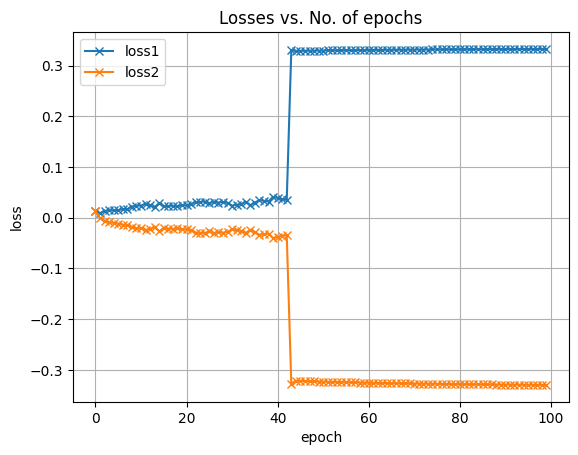

In [32]:
plot_history(history)

In [ ]:
# /home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints


In [37]:
print(model)

UsadModel(
  (encoder): Encoder(
    (linear1): Linear(in_features=72, out_features=36, bias=True)
    (linear2): Linear(in_features=36, out_features=18, bias=True)
    (linear3): Linear(in_features=18, out_features=9, bias=True)
    (relu): ReLU(inplace=True)
  )
  (decoder1): Decoder(
    (linear1): Linear(in_features=9, out_features=18, bias=True)
    (linear2): Linear(in_features=18, out_features=36, bias=True)
    (linear3): Linear(in_features=36, out_features=72, bias=True)
    (relu): ReLU(inplace=True)
    (sigmoid): Sigmoid()
  )
  (decoder2): Decoder(
    (linear1): Linear(in_features=9, out_features=18, bias=True)
    (linear2): Linear(in_features=18, out_features=36, bias=True)
    (linear3): Linear(in_features=36, out_features=72, bias=True)
    (relu): ReLU(inplace=True)
    (sigmoid): Sigmoid()
  )
)


In [33]:
torch.save({
            #'epoch': N_EPOCHS,
            #'model': model.state_dict(),
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "/home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints/model_100epochs_univariate.pth")

In [34]:
checkpoint = torch.load("/home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints/model_test2_5epochs.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [47]:
def create_train_eval_sequences(dataframe, time_steps):
  scaler = MinMaxScaler(feature_range=(0,1))
  output = []
  output2=[]
  for building_id, gdf in dataframe.groupby("building_id"):
      gdf[['meter_reading', 'sea_level_pressure']] = scaler.fit_transform(gdf[['meter_reading', 'sea_level_pressure']])
      building_data = np.array(gdf[['meter_reading']]).astype(float) #, 'weekday_x', 'weekday_y', 'is_holiday'
      for i in range(len(building_data) - time_steps + 1):
        # find the end of this sequence
        end_ix = i + time_steps
        # check if we are beyond the dataset length for this building
        if end_ix > len(building_data)-1:
          break
        output.append(building_data[i : (i + time_steps),:])
        output2.append(building_data[i : (i + time_steps),0])
  return np.stack(output), np.stack(output2)

In [48]:
X_test, y_test = create_train_eval_sequences(test, train_window)

In [49]:
X_test.shape, y_test.shape

((331056, 72, 1), (331056, 72))

In [50]:
test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(X_test).float().view(([X_test.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [51]:
results=testing(model,test_loader) #Prova con il test set

In [104]:
results, w1, w2 = testing_prova(model, test_loader)

In [105]:
results

[tensor([0.0113, 0.0104, 0.0100, 0.0099, 0.0099, 0.0098, 0.0098, 0.0098, 0.0098,
         0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
         0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
         0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
         0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
         0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
         0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
         0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
         0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
         0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
         0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
         0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098, 0.0098,
         0.0098, 0.0098, 0.0

In [106]:
w1

[tensor([[0.1968, 0.1894, 0.1810,  ..., 0.1857, 0.1890, 0.1910],
         [0.1780, 0.1708, 0.1640,  ..., 0.1825, 0.1858, 0.1873],
         [0.1691, 0.1620, 0.1559,  ..., 0.1810, 0.1842, 0.1854],
         ...,
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834]],
        device='cuda:0'),
 tensor([[0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         ...,
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834]],
        device='cuda:0'),
 tensor([[0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
        

In [194]:
w2

[tensor([[7.9809e-13, 1.6776e-13, 6.6626e-14,  ..., 4.1339e-12, 2.2729e-12,
          3.2825e-12],
         [6.0524e-13, 1.2435e-13, 4.8787e-14,  ..., 3.2205e-12, 1.7531e-12,
          2.5369e-12],
         [5.2850e-13, 1.0738e-13, 4.1879e-14,  ..., 2.8493e-12, 1.5435e-12,
          2.2359e-12],
         ...,
         [4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12, 1.3619e-12,
          1.9748e-12],
         [4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12, 1.3619e-12,
          1.9748e-12],
         [4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12, 1.3619e-12,
          1.9748e-12]], device='cuda:0'),
 tensor([[4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12, 1.3619e-12,
          1.9748e-12],
         [4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12, 1.3619e-12,
          1.9748e-12],
         [4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12, 1.3619e-12,
          1.9748e-12],
         ...,
         [4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12

In [107]:
len(test_loader)

2587

In [108]:
batches = []
for [batch] in test_loader:
    batches.append(batch)
batches

[tensor([[0.3504, 0.2448, 0.1919,  ..., 0.1391, 0.1391, 0.1391],
         [0.2448, 0.1919, 0.1655,  ..., 0.1391, 0.1391, 0.1391],
         [0.1919, 0.1655, 0.1523,  ..., 0.1391, 0.1391, 0.1391],
         ...,
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391]]),
 tensor([[0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         ...,
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391]]),
 tensor([[0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.

In [109]:
len(w1)

2587

In [172]:
len(w2)

2587

In [110]:
len(w1[1]), len(w1[-1])

(128, 48)

In [173]:
len(w2[1]), len(w2[-1])

(128, 48)

In [111]:
w2

[tensor([[7.9809e-13, 1.6776e-13, 6.6626e-14,  ..., 4.1339e-12, 2.2729e-12,
          3.2825e-12],
         [6.0524e-13, 1.2435e-13, 4.8787e-14,  ..., 3.2205e-12, 1.7531e-12,
          2.5369e-12],
         [5.2850e-13, 1.0738e-13, 4.1879e-14,  ..., 2.8493e-12, 1.5435e-12,
          2.2359e-12],
         ...,
         [4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12, 1.3619e-12,
          1.9748e-12],
         [4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12, 1.3619e-12,
          1.9748e-12],
         [4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12, 1.3619e-12,
          1.9748e-12]], device='cuda:0'),
 tensor([[4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12, 1.3619e-12,
          1.9748e-12],
         [4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12, 1.3619e-12,
          1.9748e-12],
         [4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12, 1.3619e-12,
          1.9748e-12],
         ...,
         [4.6258e-13, 9.2965e-14, 3.6046e-14,  ..., 2.5261e-12

In [112]:
w1

[tensor([[0.1968, 0.1894, 0.1810,  ..., 0.1857, 0.1890, 0.1910],
         [0.1780, 0.1708, 0.1640,  ..., 0.1825, 0.1858, 0.1873],
         [0.1691, 0.1620, 0.1559,  ..., 0.1810, 0.1842, 0.1854],
         ...,
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834]],
        device='cuda:0'),
 tensor([[0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         ...,
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834]],
        device='cuda:0'),
 tensor([[0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
         [0.1607, 0.1537, 0.1482,  ..., 0.1793, 0.1825, 0.1834],
        

In [113]:
import torch.nn.functional as F

In [114]:
last = w1[-1]

In [115]:
last

tensor([[0.3253, 0.3183, 0.3132,  ..., 0.3475, 0.3500, 0.3478],
        [0.3249, 0.3180, 0.3130,  ..., 0.3476, 0.3503, 0.3481],
        [0.3247, 0.3178, 0.3130,  ..., 0.3476, 0.3504, 0.3484],
        ...,
        [0.3270, 0.3185, 0.3124,  ..., 0.3479, 0.3513, 0.3494],
        [0.3280, 0.3196, 0.3135,  ..., 0.3471, 0.3504, 0.3487],
        [0.3291, 0.3206, 0.3144,  ..., 0.3466, 0.3499, 0.3481]],
       device='cuda:0')

In [174]:
last2 = w2[-1]
last2, last2.size()

(tensor([[4.0555e-14, 7.1235e-15, 2.5489e-15,  ..., 2.5416e-13, 1.3327e-13,
          2.0306e-13],
         [3.9516e-14, 6.9303e-15, 2.4776e-15,  ..., 2.4792e-13, 1.2992e-13,
          1.9805e-13],
         [3.8583e-14, 6.7567e-15, 2.4137e-15,  ..., 2.4231e-13, 1.2690e-13,
          1.9355e-13],
         ...,
         [2.3612e-14, 3.9484e-15, 1.3735e-15,  ..., 1.5807e-13, 8.1450e-14,
          1.2429e-13],
         [2.4274e-14, 4.0676e-15, 1.4167e-15,  ..., 1.6227e-13, 8.3696e-14,
          1.2766e-13],
         [2.4882e-14, 4.1783e-15, 1.4569e-15,  ..., 1.6608e-13, 8.5736e-14,
          1.3073e-13]], device='cuda:0'),
 torch.Size([48, 72]))

In [116]:
last.size()

torch.Size([48, 72])

In [117]:
len(last)

48

In [118]:
padded_last = F.pad(last, (0, 0, 0, 128-48))
padded_last

tensor([[0.3253, 0.3183, 0.3132,  ..., 0.3475, 0.3500, 0.3478],
        [0.3249, 0.3180, 0.3130,  ..., 0.3476, 0.3503, 0.3481],
        [0.3247, 0.3178, 0.3130,  ..., 0.3476, 0.3504, 0.3484],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [175]:
padded_last2 = F.pad(last2, (0, 0, 0, 128-48))
padded_last2

tensor([[4.0555e-14, 7.1235e-15, 2.5489e-15,  ..., 2.5416e-13, 1.3327e-13,
         2.0306e-13],
        [3.9516e-14, 6.9303e-15, 2.4776e-15,  ..., 2.4792e-13, 1.2992e-13,
         1.9805e-13],
        [3.8583e-14, 6.7567e-15, 2.4137e-15,  ..., 2.4231e-13, 1.2690e-13,
         1.9355e-13],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]], device='cuda:0')

In [119]:
len(padded_last[47])

72

In [120]:
len(w1[:-1])

2586

In [121]:
new_lista = w1[:-1]
new_lista.append(padded_last)

In [176]:
new_lista2 = w2[:-1]
new_lista2.append(padded_last2)

In [122]:
res_w1 = torch.cat(new_lista, dim=0)
res_w1

tensor([[0.1968, 0.1894, 0.1810,  ..., 0.1857, 0.1890, 0.1910],
        [0.1780, 0.1708, 0.1640,  ..., 0.1825, 0.1858, 0.1873],
        [0.1691, 0.1620, 0.1559,  ..., 0.1810, 0.1842, 0.1854],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [177]:
res_w2 = torch.cat(new_lista2, dim=0)
res_w2

tensor([[7.9809e-13, 1.6776e-13, 6.6626e-14,  ..., 4.1339e-12, 2.2729e-12,
         3.2825e-12],
        [6.0524e-13, 1.2435e-13, 4.8787e-14,  ..., 3.2205e-12, 1.7531e-12,
         2.5369e-12],
        [5.2850e-13, 1.0738e-13, 4.1879e-14,  ..., 2.8493e-12, 1.5435e-12,
         2.2359e-12],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]], device='cuda:0')

In [123]:
res_w1.size() # Need to eliminate last 128-48 = 80 rows (padded before) #42

torch.Size([331136, 72])

In [178]:
res_w2.size()

torch.Size([331136, 72])

In [124]:
original_rec = res_w1[:-80]

In [179]:
original_rec2 = res_w2[:-80]

In [125]:
original_rec.size()

torch.Size([331056, 72])

In [180]:
original_rec2.size()

torch.Size([331056, 72])

In [126]:
origin_rec = original_rec.detach().cpu().numpy()
origin_rec

array([[0.19683616, 0.18942076, 0.1809741 , ..., 0.18568541, 0.1890151 ,
        0.1910459 ],
       [0.17801553, 0.17078991, 0.16395877, ..., 0.18252547, 0.1857852 ,
        0.18725598],
       [0.16914725, 0.16203414, 0.15594506, ..., 0.18096116, 0.18418624,
        0.18538277],
       ...,
       [0.32697415, 0.31850433, 0.3124421 , ..., 0.3478779 , 0.35127527,
        0.34943658],
       [0.3280397 , 0.3195687 , 0.3134548 , ..., 0.34707764, 0.35043383,
        0.34865826],
       [0.3290657 , 0.3205837 , 0.31444913, ..., 0.34655797, 0.34985414,
        0.34809646]], dtype=float32)

In [181]:
origin_rec2 = original_rec2.detach().cpu().numpy()
origin_rec2

array([[7.9809380e-13, 1.6775605e-13, 6.6625863e-14, ..., 4.1339007e-12,
        2.2728726e-12, 3.2825142e-12],
       [6.0523727e-13, 1.2434773e-13, 4.8786940e-14, ..., 3.2205358e-12,
        1.7531336e-12, 2.5369416e-12],
       [5.2850384e-13, 1.0737883e-13, 4.1879023e-14, ..., 2.8493317e-12,
        1.5435360e-12, 2.2358816e-12],
       ...,
       [2.3612124e-14, 3.9483835e-15, 1.3734654e-15, ..., 1.5806546e-13,
        8.1450058e-14, 1.2428655e-13],
       [2.4273620e-14, 4.0676470e-15, 1.4166531e-15, ..., 1.6227162e-13,
        8.3696288e-14, 1.2765932e-13],
       [2.4881647e-14, 4.1782539e-15, 1.4568965e-15, ..., 1.6607638e-13,
        8.5736173e-14, 1.3073131e-13]], dtype=float32)

In [127]:
origin_rec.shape

(331056, 72)

In [182]:
origin_rec2.shape

(331056, 72)

In [135]:
# Define a function to revert the sliding window application
def reconstruction_windows(timeseries):
  """
  This function takes as input the windows regarding a single time series in the original dataset.
  Input: timeseries.shape = (8713, 72), where 72 = window_size, 8713 = number_of_windows = 24*366 - window_size + 1
  Output: media.shape = (24*366, 1) ---> meter_reading column reconstructed, by averaging the reconstructions for the same points
  """
  df_x_train = pd.DataFrame(np.squeeze(timeseries))
  transposed_df = df_x_train.T
  nan_rows = np.full((8784-transposed_df.shape[0],transposed_df.shape[1]),np.nan)
  rows = pd.DataFrame(nan_rows)
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
  for i in range(0, transposed_df.shape[1]):
    col = transposed_df.iloc[:, i].shift(i)
    transposed_df.iloc[:, i] = col
  retransposed = transposed_df.T
  media = np.nanmean(retransposed, axis = 0)
  return media

def apply_reconstruction(dataframe, n_timeseries):
  # Take the entire dataframe
  squeezed_df = np.squeeze(dataframe)
  # Reshape it: ex. train (162, 8713, 72) ---> 162 = number of timeseries in the dataframe
  reshaped = np.reshape(squeezed_df, (n_timeseries, 8712, 72)) #8713
  reconstruction = []
  i = 0
  for timeseries in reshaped:
    # Reconstruct separately each timeseries
    print(i)
    average_reconstruction = reconstruction_windows(timeseries)
    reconstruction.append(average_reconstruction)
    i = i+1
  final_reconstruction = np.squeeze(reconstruction)
  fr = np.reshape(final_reconstruction, (n_timeseries*8784, 1))
  return fr

In [136]:
reconstruction = apply_reconstruction(origin_rec, test.building_id.nunique())

0


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


1


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


2


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


3


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


4


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


5


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


6


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


7


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


8


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


9


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


10


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


11


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


12


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


13


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


14


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


15


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


16


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


17


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


18


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


19


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


20


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


21


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


22


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


23


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


24


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


25


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


26


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


27


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


28


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


29


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


30


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


31


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


32


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


33


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


34


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


35


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


36


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


37


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


In [183]:
reconstruction2 = apply_reconstruction(origin_rec2, test.building_id.nunique())

0


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


1


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


2


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


3


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


4


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


5


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


6


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


7


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


8


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


9


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


10


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


11


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


12


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


13


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


14


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


15


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


16


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


17


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


18


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


19


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


20


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


21


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


22


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


23


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


24


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


25


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


26


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


27


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


28


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


29


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


30


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


31


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


32


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


33


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


34


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


35


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


36


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


37


/tmp/ipykernel_25551/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_25551/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


In [185]:
scaler = MinMaxScaler(feature_range=(0,1))

In [186]:
dfs_dict_1 = {}
for building_id, gdf in test.groupby("building_id"):
  gdf[['meter_reading']]=scaler.fit_transform(gdf[['meter_reading']])
  dfs_dict_1[building_id] = gdf
predicted_df_test = pd.concat(dfs_dict_1.values())

In [187]:
predicted_df_test['reconstruction'] = reconstruction

In [188]:
predicted_df_test['reconstruction2'] = reconstruction2

In [189]:
predicted_df_test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00       0.350417               967.2           1        0   
2016-01-01 01:00:00       0.244752              1019.4           1        0   
2016-01-01 02:00:00       0.191920              1018.8           1        0   
2016-01-01 03:00:00       0.165504              1018.1           1        0   
2016-01-01 04:00:00       0.152296              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511               967.2           0        0   
2016-12-31 20:00:00       0.336511               967.2           0        0   
2016-12-31 21:00:00       0.336511               967.2           0        0   
2016-12-31 22:00:00       0.336511               967.2           0        0   
2016-12-31 23:00:00       0.336511               967.2           0        0   

                     weekday  weekday_y  weekday_x  reconstruction  \
2016-01-01 00:00:00        4  -0.433884  -0.900969        0.196836   
2016-01-01 01:00:00        4  -0.433884  -0.900969        0.183718   
2016-01-01 02:00:00        4  -0.433884  -0.900969        0.173637   
2016-01-01 03:00:00        4  -0.433884  -0.900969        0.165801   
2016-01-01 04:00:00        4  -0.433884  -0.900969        0.159675   
...                      ...        ...        ...             ...   
2016-12-31 19:00:00        5  -0.974928  -0.222521        0.346759   
2016-12-31 20:00:00        5  -0.974928  -0.222521        0.348809   
2016-12-31 21:00:00        5  -0.974928  -0.222521        0.349256   
2016-12-31 22:00:00        5  -0.974928  -0.222521        0.348096   
2016-12-31 23:00:00        5  -0.974928  -0.222521             NaN   

                     reconstruction2  
2016-01-01 00:00:00     7.980938e-13  
2016-01-01 01:00:00     3.864967e-13  
2016-01-01 02:00:00     2.398258e-13  
2016-01-01 03:00:00     1.695081e-13  
2016-01-01 04:00:00     1.328173e-13  
...                              ...  
2016-12-31 19:00:00     3.090541e-13  
2016-12-31 20:00:00     1.246864e-13  
2016-12-31 21:00:00     1.066977e-13  
2016-12-31 22:00:00     1.307313e-13  
2016-12-31 23:00:00              NaN  

[333792 rows x 11 columns]

In [ ]:
#result = [None if np.isnan(el) == True else el for el in readings]

In [190]:
predicted_df_test['reconstruction']=predicted_df_test['reconstruction'].replace(np.nan,0)

In [191]:
predicted_df_test['reconstruction2']=predicted_df_test['reconstruction2'].replace(np.nan,0)

In [192]:
predicted_df_test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00       0.350417               967.2           1        0   
2016-01-01 01:00:00       0.244752              1019.4           1        0   
2016-01-01 02:00:00       0.191920              1018.8           1        0   
2016-01-01 03:00:00       0.165504              1018.1           1        0   
2016-01-01 04:00:00       0.152296              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511               967.2           0        0   
2016-12-31 20:00:00       0.336511               967.2           0        0   
2016-12-31 21:00:00       0.336511               967.2           0        0   
2016-12-31 22:00:00       0.336511               967.2           0        0   
2016-12-31 23:00:00       0.336511               967.2           0        0   

                     weekday  weekday_y  weekday_x  reconstruction  \
2016-01-01 00:00:00        4  -0.433884  -0.900969        0.196836   
2016-01-01 01:00:00        4  -0.433884  -0.900969        0.183718   
2016-01-01 02:00:00        4  -0.433884  -0.900969        0.173637   
2016-01-01 03:00:00        4  -0.433884  -0.900969        0.165801   
2016-01-01 04:00:00        4  -0.433884  -0.900969        0.159675   
...                      ...        ...        ...             ...   
2016-12-31 19:00:00        5  -0.974928  -0.222521        0.346759   
2016-12-31 20:00:00        5  -0.974928  -0.222521        0.348809   
2016-12-31 21:00:00        5  -0.974928  -0.222521        0.349256   
2016-12-31 22:00:00        5  -0.974928  -0.222521        0.348096   
2016-12-31 23:00:00        5  -0.974928  -0.222521        0.000000   

                     reconstruction2  
2016-01-01 00:00:00     7.980938e-13  
2016-01-01 01:00:00     3.864967e-13  
2016-01-01 02:00:00     2.398258e-13  
2016-01-01 03:00:00     1.695081e-13  
2016-01-01 04:00:00     1.328173e-13  
...                              ...  
2016-12-31 19:00:00     3.090541e-13  
2016-12-31 20:00:00     1.246864e-13  
2016-12-31 21:00:00     1.066977e-13  
2016-12-31 22:00:00     1.307313e-13  
2016-12-31 23:00:00     0.000000e+00  

[333792 rows x 11 columns]

In [193]:
predicted_df_test.reconstruction2.min(), predicted_df_test.reconstruction2.max()

(0.0, 5.9164706e-10)

In [195]:
predicted_df_test['relative_loss'] = np.abs((predicted_df_test['reconstruction']-predicted_df_test['meter_reading'])/predicted_df_test['reconstruction'])

In [196]:
predicted_df_test['relative_loss2'] = np.abs((predicted_df_test['reconstruction2']-predicted_df_test['meter_reading'])/predicted_df_test['reconstruction2'])

In [197]:
#calculate threshold on relative loss quartiles but only on val, and in this case per building
thresholds=np.array([])
for building_id, gdf in predicted_df_test.groupby("building_id"):
  val_mre_loss_building= gdf['relative_loss'].values
  building_threshold = (np.percentile(val_mre_loss_building, 75)) + 1.5 *((np.percentile(val_mre_loss_building, 75))-(np.percentile(val_mre_loss_building, 25)))
  gdf['threshold']=building_threshold
  thresholds= np.append(thresholds, gdf['threshold'].values)
print(thresholds.shape)
predicted_df_test['threshold']= thresholds

(333792,)


In [198]:
#calculate threshold on relative loss quartiles but only on val, and in this case per building
thresholds=np.array([])
for building_id, gdf in predicted_df_test.groupby("building_id"):
  val_mre_loss_building= gdf['relative_loss2'].values
  building_threshold = (np.percentile(val_mre_loss_building, 75)) + 1.5 *((np.percentile(val_mre_loss_building, 75))-(np.percentile(val_mre_loss_building, 25)))
  gdf['threshold2']=building_threshold
  thresholds= np.append(thresholds, gdf['threshold2'].values)
print(thresholds.shape)
predicted_df_test['threshold2']= thresholds

(333792,)


In [199]:
predicted_df_test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00       0.350417               967.2           1        0   
2016-01-01 01:00:00       0.244752              1019.4           1        0   
2016-01-01 02:00:00       0.191920              1018.8           1        0   
2016-01-01 03:00:00       0.165504              1018.1           1        0   
2016-01-01 04:00:00       0.152296              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511               967.2           0        0   
2016-12-31 20:00:00       0.336511               967.2           0        0   
2016-12-31 21:00:00       0.336511               967.2           0        0   
2016-12-31 22:00:00       0.336511               967.2           0        0   
2016-12-31 23:00:00       0.336511               967.2           0        0   

                     weekday  weekday_y  weekday_x  reconstruction  \
2016-01-01 00:00:00        4  -0.433884  -0.900969        0.196836   
2016-01-01 01:00:00        4  -0.433884  -0.900969        0.183718   
2016-01-01 02:00:00        4  -0.433884  -0.900969        0.173637   
2016-01-01 03:00:00        4  -0.433884  -0.900969        0.165801   
2016-01-01 04:00:00        4  -0.433884  -0.900969        0.159675   
...                      ...        ...        ...             ...   
2016-12-31 19:00:00        5  -0.974928  -0.222521        0.346759   
2016-12-31 20:00:00        5  -0.974928  -0.222521        0.348809   
2016-12-31 21:00:00        5  -0.974928  -0.222521        0.349256   
2016-12-31 22:00:00        5  -0.974928  -0.222521        0.348096   
2016-12-31 23:00:00        5  -0.974928  -0.222521        0.000000   

                     reconstruction2  relative_loss  relative_loss2  \
2016-01-01 00:00:00     7.980938e-13       0.780246    4.390671e+11   
2016-01-01 01:00:00     3.864967e-13       0.332217    6.332588e+11   
2016-01-01 02:00:00     2.398258e-13       0.105295    8.002485e+11   
2016-01-01 03:00:00     1.695081e-13       0.001788    9.763794e+11   
2016-01-01 04:00:00     1.328173e-13       0.046214    1.146659e+12   
...                              ...            ...             ...   
2016-12-31 19:00:00     3.090541e-13       0.029554    1.088841e+12   
2016-12-31 20:00:00     1.246864e-13       0.035259    2.698856e+12   
2016-12-31 21:00:00     1.066977e-13       0.036493    3.153869e+12   
2016-12-31 22:00:00     1.307313e-13       0.033283    2.574063e+12   
2016-12-31 23:00:00     0.000000e+00            inf             inf   

                     threshold    threshold2  
2016-01-01 00:00:00   0.560896  2.243892e+13  
2016-01-01 01:00:00   0.560896  2.243892e+13  
2016-01-01 02:00:00   0.560896  2.243892e+13  
2016-01-01 03:00:00   0.560896  2.243892e+13  
2016-01-01 04:00:00   0.560896  2.243892e+13  
...                        ...           ...  
2016-12-31 19:00:00   0.201642  1.620202e+12  
2016-12-31 20:00:00   0.201642  1.620202e+12  
2016-12-31 21:00:00   0.201642  1.620202e+12  
2016-12-31 22:00:00   0.201642  1.620202e+12  
2016-12-31 23:00:00   0.201642  1.620202e+12  

[333792 

In [200]:
predicted_df_test['predicted_anomaly'] = predicted_df_test['relative_loss'] > predicted_df_test['threshold']
predicted_df_test['predicted_anomaly']=predicted_df_test['predicted_anomaly'].replace(False,0)
predicted_df_test['predicted_anomaly']=predicted_df_test['predicted_anomaly'].replace(True,1)

/tmp/ipykernel_25551/2648773490.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicted_df_test['predicted_anomaly']=predicted_df_test['predicted_anomaly'].replace(True,1)


In [201]:
predicted_df_test['predicted_anomaly2'] = predicted_df_test['relative_loss2'] > predicted_df_test['threshold2']
predicted_df_test['predicted_anomaly2']=predicted_df_test['predicted_anomaly2'].replace(False,0)
predicted_df_test['predicted_anomaly2']=predicted_df_test['predicted_anomaly2'].replace(True,1)

/tmp/ipykernel_25551/3307754308.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicted_df_test['predicted_anomaly2']=predicted_df_test['predicted_anomaly2'].replace(True,1)


In [202]:
predicted_df_test.index.names=['timestamp']
predicted_df_test= predicted_df_test.reset_index()

In [203]:
predicted_df_test.predicted_anomaly.unique()

array([1, 0])

In [204]:
predicted_df_test.predicted_anomaly2.unique()

array([0, 1])

In [205]:
predicted_anomalies = predicted_df_test.loc[predicted_df_test['predicted_anomaly'] == 1]
predicted_anomalies2 = predicted_df_test.loc[predicted_df_test['predicted_anomaly2'] == 1]
true_anomalies = predicted_df_test.loc[predicted_df_test['anomaly'] == 1]

In [206]:
predicted_df_test = pd.merge(predicted_df_test, df[['timestamp','building_id']], on=['timestamp','building_id'])

In [207]:
print(classification_report(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly']))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    324574
           1       0.25      0.52      0.34      7767

    accuracy                           0.95    332341
   macro avg       0.62      0.74      0.66    332341
weighted avg       0.97      0.95      0.96    332341



In [208]:
print(classification_report(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly2']))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94    324574
           1       0.03      0.11      0.04      7767

    accuracy                           0.89    332341
   macro avg       0.50      0.51      0.49    332341
weighted avg       0.95      0.89      0.92    332341



In [209]:
roc_auc_score(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly'])

0.7404775869475362

In [210]:
roc_auc_score(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly2'])

0.5095858976387776

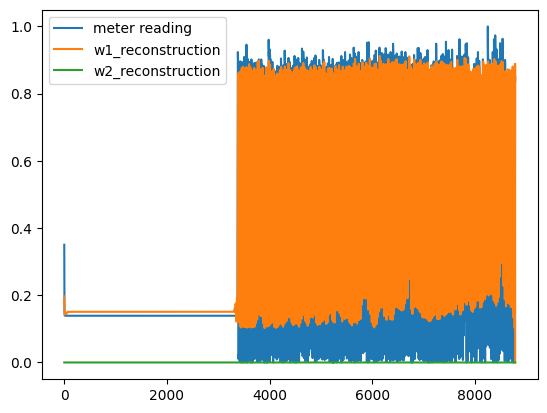

In [211]:
plt.plot(predicted_df_test.meter_reading[:8784], label = "meter reading")
plt.plot(predicted_df_test.reconstruction[:8784], label = "w1_reconstruction")
plt.plot(predicted_df_test.reconstruction2[:8784], label = "w2_reconstruction")
plt.legend()
plt.show()

In [ ]:
predicted_anomalies = predicted_df_test.loc[predicted_df_test['predicted_anomaly'] == 1]
true_anomalies = predicted_df_test.loc[predicted_df_test['anomaly'] == 1]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=predicted_df_test.index, y=predicted_df_test['meter_reading'], name='meter readings'))
fig.add_trace(go.Scatter(x=predicted_df_test.index, y=predicted_df_test['reconstruction'], name='meter readings reconstructed'))

fig.add_trace(go.Scatter(x=true_anomalies['timestamp'], y=true_anomalies['meter_reading'], mode='markers', marker=dict(color='forestgreen'), name='True_Anomaly'))
fig.update_layout(showlegend=True, title='meter readings predicted and anomalies - val')
fig.show()

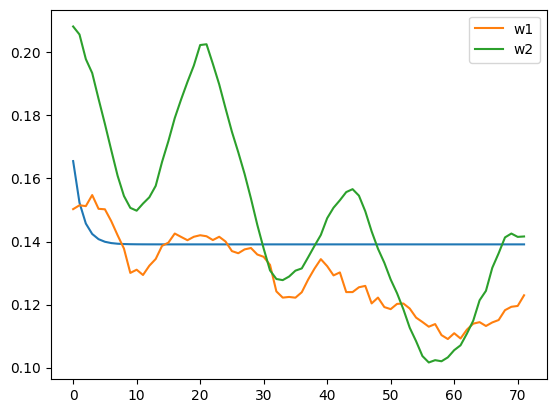

In [56]:
plt.plot(batches[0][3])
plt.plot(w1[0][3].cpu(), label = "w1")
plt.plot(w2[0][3].cpu(), label = "w2")
plt.legend()
plt.show()

In [44]:
len(results), len(results[0])

(2587, 128)

In [45]:
results[-1]

tensor([0.0075, 0.0074, 0.0074, 0.0074, 0.0073, 0.0073, 0.0072, 0.0072, 0.0072,
        0.0071, 0.0071, 0.0071, 0.0071, 0.0070, 0.0070, 0.0071, 0.0071, 0.0071,
        0.0072, 0.0072, 0.0073, 0.0073, 0.0074, 0.0074, 0.0074, 0.0073, 0.0073,
        0.0072, 0.0071, 0.0071, 0.0070, 0.0069, 0.0069, 0.0068, 0.0068, 0.0068,
        0.0067, 0.0067, 0.0067, 0.0067, 0.0067, 0.0067, 0.0067, 0.0066, 0.0066,
        0.0066, 0.0066, 0.0066], device='cuda:0')

In [45]:
(len(results)-1) * len(results[0]) + len(results[-1])

331094

In [46]:
len(test.anomaly)

333792

Let's create the dataset to perform predictions.

In [80]:
scaler = MinMaxScaler(feature_range=(0,1))

In [81]:
dfs_dict_1 = {}
for building_id, gdf in test.groupby("building_id"):
  gdf[['meter_reading', 'sea_level_pressure']]=scaler.fit_transform(gdf[['meter_reading', 'sea_level_pressure']])
  dfs_dict_1[building_id] = gdf[train_window:]
predicted_df = pd.concat(dfs_dict_1.values())

In [56]:
lista = []
for el in results:
  for el2 in el:
    lista.append(el2.cpu().item())

In [57]:
lista

[0.011300304904580116,
 0.010378471575677395,
 0.010048032738268375,
 0.009915856644511223,
 0.009858008474111557,
 0.00983110349625349,
 0.00981817301362753,
 0.00981183722615242,
 0.009808702394366264,
 0.009807144291698933,
 0.009806365706026554,
 0.00980597734451294,
 0.009805782698094845,
 0.009805685840547085,
 0.00980563834309578,
 0.009805613197386265,
 0.009805601090192795,
 0.009805596433579922,
 0.009805592708289623,
 0.009805590845644474,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.009805588982999325,
 0.0098055889829

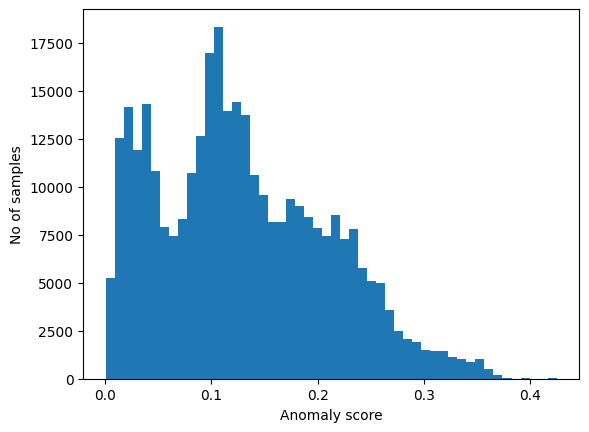

In [58]:
plt.hist(lista, bins=50)
plt.xlabel("Anomaly score")
plt.ylabel("No of samples")
plt.show()

In [82]:
predicted_df['predictions'] = lista

In [60]:
predicted_df

building_id                    primary_use  \
2016-01-04 00:00:00           69                        Parking   
2016-01-04 01:00:00           69                        Parking   
2016-01-04 02:00:00           69                        Parking   
2016-01-04 03:00:00           69                        Parking   
2016-01-04 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-04 00:00:00       0.139088            0.757143           0        0   
2016-01-04 01:00:00       0.139088            0.760317           0        0   
2016-01-04 02:00:00       0.139088            0.746032           0        0   
2016-01-04 03:00:00       0.139088            0.742857           0        0   
2016-01-04 04:00:00       0.139088            0.738095           0        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511            0.000000           0        0   
2016-12-31 20:00:00       0.336511            0.000000           0        0   
2016-12-31 21:00:00       0.336511            0.000000           0        0   
2016-12-31 22:00:00       0.336511            0.000000           0        0   
2016-12-31 23:00:00       0.336511            0.000000           0        0   

                     weekday  weekday_y  weekday_x  predictions  
2016-01-04 00:00:00        0   0.000000   1.000000     0.011300  
2016-01-04 01:00:00        0   0.000000   1.000000     0.010378  
2016-01-04 02:00:00        0   0.000000   1.000000     0.010048  
2016-01-04 03:00:00        0   0.000000   1.000000     0.009916  
2016-01-04 04:00:00        0   0.000000   1.000000     0.009858  
...                      ...        ...        ...          ...  
2016-12-31 19:00:00        5  -0.974928  -0.222521     0.055168  
2016-12-31 20:00:00        5  -0.974928  -0.222521     0.055275  
2016-12-31 21:00:00        5  -0.974928  -0.222521     0.055381  
2016-12-31 22:00:00        5  -0.974928  -0.222521     0.055486  
2016-12-31 23:00:00        5  -0.974928  -0.222521     0.055592  

[331056 rows x 10 columns]

In [61]:
predicted_df.predictions.min(), predicted_df.predictions.max() #Ricorda: non sono vere e proprie predizioni, si tratta dell'anomaly score

(0.0005914548528380692, 0.42487120628356934)

In [93]:
perc = 90
threshold = (np.percentile(predicted_df.predictions.values, perc))

In [94]:
threshold

0.2411863923072815

In [95]:
predicted_df['threshold'] = threshold

In [96]:
predicted_df['predicted_anomaly'] = predicted_df.predictions > predicted_df['threshold']#anomalies #predicted_df['threshold']#
predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(False,0)
predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(True,1)

/tmp/ipykernel_25551/3264709519.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(True,1)


In [141]:
predicted_df

timestamp  building_id                    primary_use  \
0      2016-01-04 00:00:00           69                        Parking   
1      2016-01-04 01:00:00           69                        Parking   
2      2016-01-04 02:00:00           69                        Parking   
3      2016-01-04 03:00:00           69                        Parking   
4      2016-01-04 04:00:00           69                        Parking   
...                    ...          ...                            ...   
329674 2016-12-31 19:00:00         1319  Entertainment/public assembly   
329675 2016-12-31 20:00:00         1319  Entertainment/public assembly   
329676 2016-12-31 21:00:00         1319  Entertainment/public assembly   
329677 2016-12-31 22:00:00         1319  Entertainment/public assembly   
329678 2016-12-31 23:00:00         1319  Entertainment/public assembly   

        meter_reading  sea_level_pressure  is_holiday  anomaly  weekday  \
0            0.139088            0.757143           0        0        0   
1            0.139088            0.760317           0        0        0   
2            0.139088            0.746032           0        0        0   
3            0.139088            0.742857           0        0        0   
4            0.139088            0.738095           0        0        0   
...               ...                 ...         ...      ...      ...   
329674       0.336511            0.000000           0        0        5   
329675       0.336511            0.000000           0        0        5   
329676       0.336511            0.000000           0        0        5   
329677       0.336511            0.000000           0        0        5   
329678       0.336511            0.000000           0        0        5   

        weekday_y  weekday_x  predictions  threshold  predicted_anomaly  
0        0.000000   1.000000     0.011300   0.241186                  0  
1        0.000000   1.000000     0.010378   0.241186                  0  
2        0.000000   1.000000     0.010048   0.241186                  0  
3        0.000000   1.000000     0.009916   0.241186                  0  
4        0.000000   1.000000     0.009858   0.241186                  0  
...           ...        ...          ...        ...                ...  
329674  -0.974928  -0.222521     0.055168   0.241186                  0  
329675  -0.974928  -0.222521     0.055275   0.241186                  0  
329676  -0.974928  -0.222521     0.055381   0.241186                  0  
329677  -0.974928  -0.222521     0.055486   0.241186                  0  
329678  -0.974928  -0.222521     0.055592   0.241186                  0  

[329679 rows x 13 columns]

In [97]:
predicted_df.predicted_anomaly.unique()

array([0, 1])

In [98]:
len(predicted_df[predicted_df.predicted_anomaly == 1])/len(predicted_df)

0.10000030332535588

In [89]:
predicted_df.index.names=['timestamp']
predicted_df= predicted_df.reset_index()

In [99]:
predicted_df = pd.merge(predicted_df, df[['timestamp','building_id']], on=['timestamp','building_id'])

In [100]:
print(classification_report(predicted_df.anomaly, predicted_df.predicted_anomaly))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94    322044
           1       0.02      0.10      0.04      7635

    accuracy                           0.88    329679
   macro avg       0.50      0.50      0.49    329679
weighted avg       0.95      0.88      0.92    329679



In [101]:
roc_auc_score(predicted_df['anomaly'], predicted_df['predicted_anomaly'])

0.49896071749363025